<a href="https://colab.research.google.com/github/angwelo/ASSIGNMENT-/blob/main/ML_Clasification_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [25]:
# STEP 1: Upload your archive (1).zip from your laptop
from google.colab import files
uploaded = files.upload()

import zipfile
import pandas as pd
import os

# STEP 2: Extract the uploaded zip file
zip_filename = "archive (1).zip"  # change if your zip has a different name
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall("dataset")  # extracts into a folder called 'dataset'

# STEP 3: Check what files were extracted
print("Extracted files:", os.listdir("dataset"))

# STEP 4: Load the CSV into a DataFrame
csv_path = "dataset/ai_assistant_usage_student_life.csv"  # adjust if name is different
df = pd.read_csv(csv_path)

# STEP 5: Preview the data
df.head()


Saving archive (1).zip to archive (1) (2).zip
Extracted files: ['ai_assistant_usage_student_life.csv']


,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,Studying,2,Assignment Completed,True,1.0
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,Studying,3,Assignment Completed,True,2.0
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,Coding,3,Assignment Completed,True,3.3
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,Coding,3,Assignment Completed,True,3.5
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,Writing,3,Assignment Completed,True,2.9


In [26]:
#Check the dataset shape (rows, columns).
rows, columns = df.shape
print("Rows:", rows, "Columns:", columns)

Rows: 10000 Columns: 11


In [27]:
#Display column names and their data types
df.dtypes

,0
SessionID,object
StudentLevel,object
Discipline,object
SessionDate,object
SessionLengthMin,float64
TotalPrompts,int64
TaskType,object
AI_AssistanceLevel,int64
FinalOutcome,object
UsedAgain,bool


In [28]:
#Check for missing values in each column.
missing_val = df.isnull().sum()
missing_val

,0
SessionID,0
StudentLevel,0
Discipline,0
SessionDate,0
SessionLengthMin,0
TotalPrompts,0
TaskType,0
AI_AssistanceLevel,0
FinalOutcome,0
UsedAgain,0


In [29]:
#Show summary statistics for SessionLengthMin and TotalPrompts.
stats = df[['SessionLengthMin','TotalPrompts']].describe()
print(stats)


       SessionLengthMin  TotalPrompts
count      10000.000000  10000.000000
mean          19.846467      5.607500
std           13.897302      4.648764
min            0.030000      1.000000
25%            9.630000      2.000000
50%           16.650000      4.000000
75%           26.670000      8.000000
max          110.810000     39.000000


In [30]:
#Find the number of unique values in StudentLevel, Discipline, and TaskType.
df[['StudentLevel', 'Discipline', 'TaskType']].nunique()

,0
StudentLevel,3
Discipline,7
TaskType,6


In [31]:
#Which TaskType is the most common?
most_common_Tasktype = df['TaskType'].mode()[0]
most_common_count = df['TaskType'].value_counts()[0]
print(most_common_Tasktype, most_common_count)

Writing 3101


/tmp/ipython-input-3042432369.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  most_common_count = df['TaskType'].value_counts()[0]


In [32]:
#Calculate the average SessionLengthMin for each StudentLevel.
avg_lengthMin = df.groupby('StudentLevel')['SessionLengthMin'].mean()
avg_lengthMin

,SessionLengthMin
StudentLevel,
Graduate,20.252236
High School,20.023740
Undergraduate,19.650943


#### Part B: Visualization


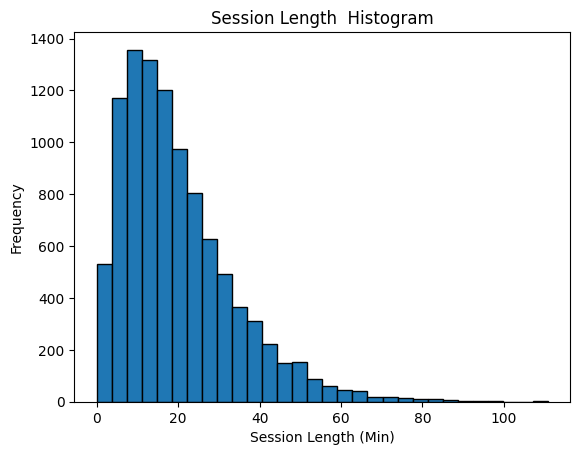

In [33]:
#Plot a histogram of SessionLengthMin.
plt.Figure(figsize=(10,6))
plt.hist(df['SessionLengthMin'], bins=30, edgecolor='black')
plt.title("Session Length  Histogram")
plt.xlabel('Session Length (Min)')
plt.ylabel('Frequency')
plt.show()

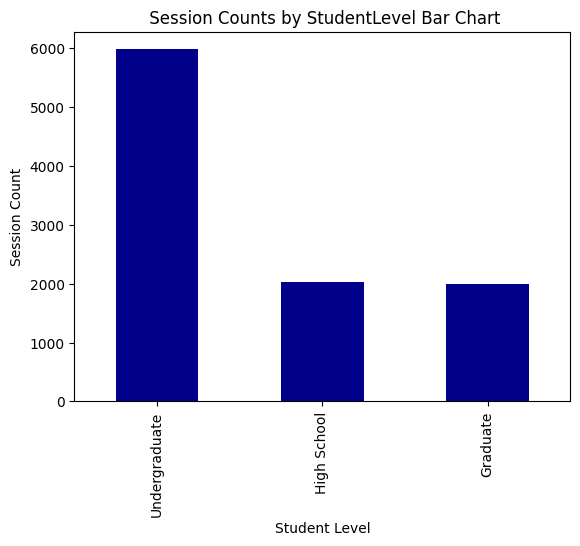

In [34]:
#Create a bar chart of session counts by StudentLevel.

#Count the number of sessions for each StudentLevel
session_count = df['StudentLevel'].value_counts()

#create bar chart
plt.Figure(figsize=(10,6))
session_count.plot(kind='bar', color='darkblue')
plt.title(" Session Counts by StudentLevel Bar Chart")
plt.xlabel("Student Level")
plt.ylabel("Session Count")
plt.show()

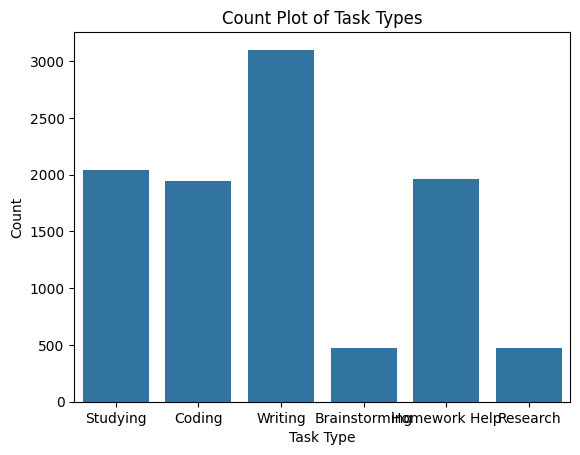

In [35]:
#Make a countplot of TaskType using Seaborn.
plt.Figure(figsize=(10,6))
sns.countplot(data=df, x=df['TaskType'])
plt.title("Count Plot of Task Types")
plt.ylabel("Count")
plt.xlabel("Task Type")
plt.show()

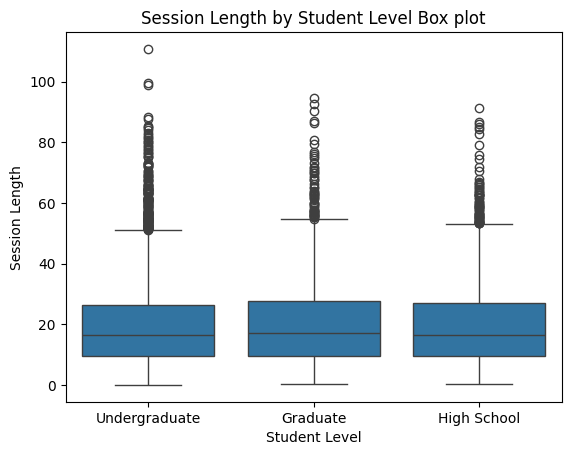

In [36]:
#Plot a boxplot of SessionLengthMin grouped by StudentLevel.
plt.Figure(figsize=(10,6))
sns.boxplot(x='StudentLevel', y='SessionLengthMin', data =df)
plt.title("Session Length by Student Level Box plot")
plt.xlabel("Student Level")
plt.ylabel("Session Length")
plt.show()

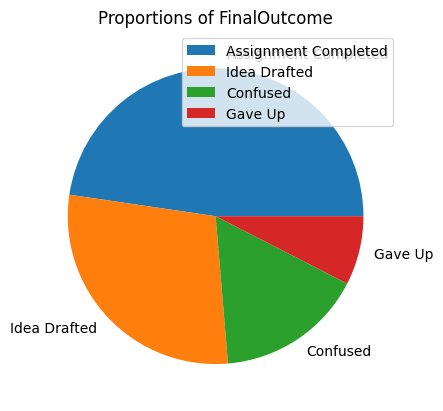

In [37]:
#Create a pie chart showing proportions of FinalOutcome.
outcome_counts = df['FinalOutcome'].value_counts()

plt.Figure(figsize=(8,8))
plt.pie(outcome_counts, labels=outcome_counts.index)
plt.title("Proportions of FinalOutcome")
plt.legend()
plt.show()

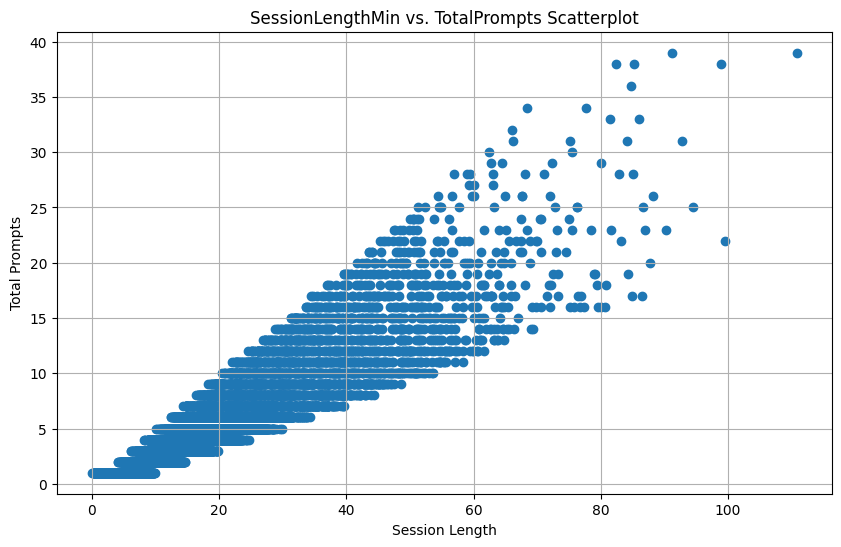

In [38]:
#Draw a scatterplot of SessionLengthMin vs. TotalPrompts.
plt.figure(figsize=(10,6))
plt.scatter(x='SessionLengthMin', y='TotalPrompts', data=df)
plt.title("SessionLengthMin vs. TotalPrompts Scatterplot")
plt.ylabel("Total Prompts")
plt.xlabel("Session Length")
plt.grid(True)
plt.show()

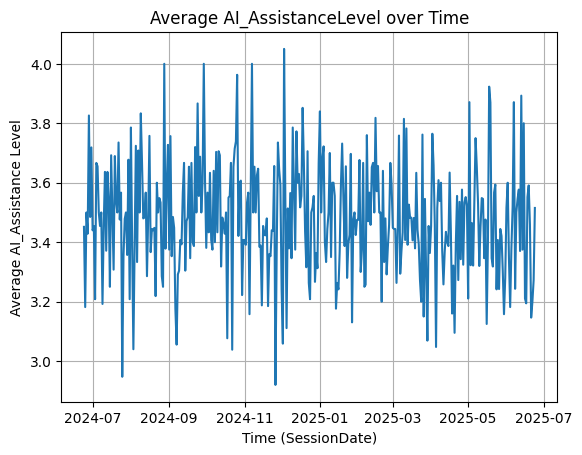

In [39]:
#Plot a line chart of average AI_AssistanceLevel over time (SessionDate)
#change SessionDate from object to datetime fromat
df['SessionDate'] = pd.to_datetime(df['SessionDate'])

#Group by SessionDate & get AVG AssistanceLevel
avg_AssistanceLevel = df.groupby('SessionDate')['AI_AssistanceLevel'].mean().reset_index()

#plot line chart
plt.Figure(figsize=(12,8))
sns.lineplot(data=avg_AssistanceLevel, x='SessionDate', y='AI_AssistanceLevel')
plt.title("Average AI_AssistanceLevel over Time")
plt.xlabel("Time (SessionDate)")
plt.ylabel("Average AI_Assistance Level")
plt.grid()
plt.show()

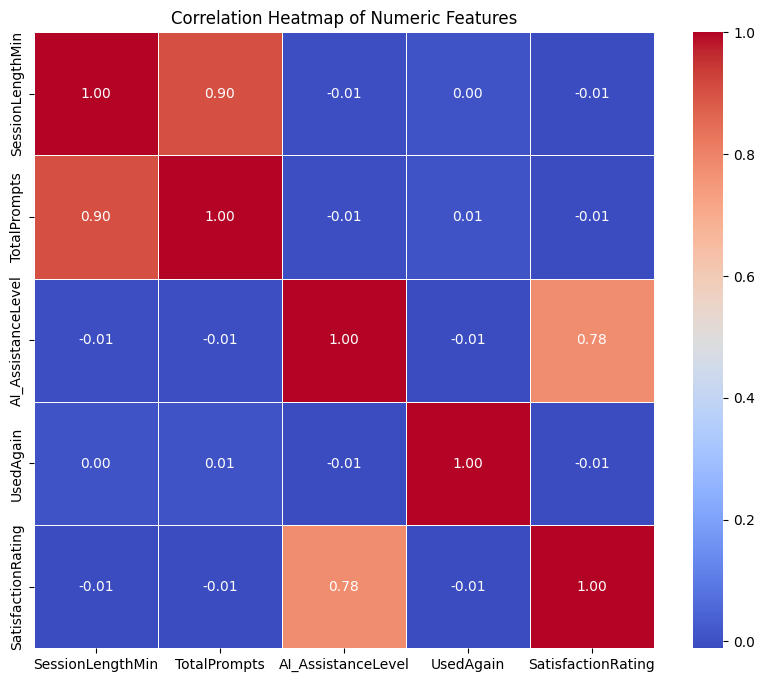

In [40]:
#Create a heatmap of correlations among numeric features
correlation = df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

#### Part C: GroupBy & Aggregations


In [41]:
#Find the average SessionLengthMin for each TaskType
avg_SessionLength = df.groupby('TaskType')['SessionLengthMin'].mean()
avg_SessionLength


,SessionLengthMin
TaskType,
Brainstorming,21.964223
Coding,19.467659
Homework Help,19.940536
Research,20.410000
Studying,19.705917
Writing,19.705888


In [42]:
#Which Discipline had the most sessions?
most_common_disc = df['Discipline'].mode()[0]
most_sessions = df['Discipline'].value_counts()[0]
print(f'{most_common_disc}', "has most sessions:", most_sessions)

Biology has most sessions: 1458


/tmp/ipython-input-1564066051.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  most_sessions = df['Discipline'].value_counts()[0]


In [43]:
#Compare average AI_AssistanceLevel across StudentLevel.
avg_AI_Assistance = df.groupby('StudentLevel')['AI_AssistanceLevel'].mean()
avg_AI_Assistance

,AI_AssistanceLevel
StudentLevel,
Graduate,3.469674
High School,3.477060
Undergraduate,3.483607


In [44]:
#Find the most common FinalOutcome for Graduate students.
#filter for Graduate students
Grad_students = df[df['StudentLevel'] == 'Graduate']

#check for most common finaloutcome in graduate students
most_comm_graduate = Grad_students['FinalOutcome'].mode()[0]
most_comm_graduate_count = Grad_students['FinalOutcome'].value_counts()[0]

#print output
print(f'{most_comm_graduate} is most common FinalOutcome: {most_comm_graduate_count}')

Assignment Completed is most common FinalOutcome: 936


/tmp/ipython-input-122845639.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  most_comm_graduate_count = Grad_students['FinalOutcome'].value_counts()[0]


In [45]:
#Calculate the median SessionLengthMin for each FinalOutcome.
median_length = df.groupby('FinalOutcome')['SessionLengthMin'].median()
median_length

,SessionLengthMin
FinalOutcome,
Assignment Completed,16.570
Confused,16.040
Gave Up,17.290
Idea Drafted,17.085


#### Part D: Feature Engineering & Encoding


In [46]:
#Convert SessionDate into Year, Month, and Day columns.


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   SessionID           10000 non-null  object        
 1   StudentLevel        10000 non-null  object        
 2   Discipline          10000 non-null  object        
 3   SessionDate         10000 non-null  datetime64[ns]
 4   SessionLengthMin    10000 non-null  float64       
 5   TotalPrompts        10000 non-null  int64         
 6   TaskType            10000 non-null  object        
 7   AI_AssistanceLevel  10000 non-null  int64         
 8   FinalOutcome        10000 non-null  object        
 9   UsedAgain           10000 non-null  bool          
 10  SatisfactionRating  10000 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 791.1+ KB


In [51]:
# Convert SessionDate into datetime format
df["SessionDate"] = pd.to_datetime(df["SessionDate"], errors="coerce")

# Extract Year, Month, and Day into new columns
df["Year"] = df["SessionDate"].dt.year
df["Month"] = df["SessionDate"].dt.month
df["Day"] = df["SessionDate"].dt.day
print(df[['Year', 'Month', 'Day']])

      Year  Month  Day
0     2024     11    3
1     2024      8   25
2     2025      1   12
3     2025      5    6
4     2025      3   18
...    ...    ...  ...
9995  2024      7   20
9996  2024     11   11
9997  2024      9   11
9998  2024     10   27
9999  2025      4   16

[10000 rows x 3 columns]


In [53]:
# Initialize encoder
le = LabelEncoder()

# Apply to StudentLevel
df["StudentLevel_encoded"] = le.fit_transform(df["StudentLevel"])

# Quick check
print("Class mapping:", dict(zip(le.classes_, le.transform(le.classes_))))
df[["StudentLevel", "StudentLevel_encoded"]].head()


Class mapping: {'Graduate': np.int64(0), 'High School': np.int64(1), 'Undergraduate': np.int64(2)}


,StudentLevel,StudentLevel_encoded
0,Undergraduate,2
1,Undergraduate,2
2,Undergraduate,2
3,Undergraduate,2
4,Undergraduate,2


In [54]:
# One-Hot Encode TaskType
df = pd.get_dummies(df, columns=["TaskType"], prefix="TaskType")

# Quick check
df.head()


,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating,Year,Month,Day,StudentLevel_encoded,TaskType_Brainstorming,TaskType_Coding,TaskType_Homework Help,TaskType_Research,TaskType_Studying,TaskType_Writing
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,2,Assignment Completed,True,1.0,2024,11,3,2,False,False,False,False,True,False
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,3,Assignment Completed,True,2.0,2024,8,25,2,False,False,False,False,True,False
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,3,Assignment Completed,True,3.3,2025,1,12,2,False,True,False,False,False,False
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,3,Assignment Completed,True,3.5,2025,5,6,2,False,True,False,False,False,False
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,3,Assignment Completed,True,2.9,2025,3,18,2,False,False,False,False,False,True


In [55]:
# Create PromptsPerMinute
df["PromptsPerMinute"] = df["TotalPrompts"] / df["SessionLengthMin"]

# Handle cases where SessionLengthMin = 0 (to avoid division by zero)
df["PromptsPerMinute"].replace([float("inf"), -float("inf")], 0, inplace=True)
df["PromptsPerMinute"].fillna(0, inplace=True)

# Quick check
df[["TotalPrompts", "SessionLengthMin", "PromptsPerMinute"]].head()


/tmp/ipython-input-4098237447.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["PromptsPerMinute"].replace([float("inf"), -float("inf")], 0, inplace=True)
/tmp/ipython-input-4098237447.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method

,TotalPrompts,SessionLengthMin,PromptsPerMinute
0,11,31.20,0.352564
1,6,13.09,0.458365
2,5,19.22,0.260146
3,1,3.70,0.270270
4,9,28.12,0.320057


In [56]:
# Create PromptsPerMinute
df["PromptsPerMinute"] = df["TotalPrompts"] / df["SessionLengthMin"]

# Replace infinities and NaN safely (no inplace warnings)
df["PromptsPerMinute"] = df["PromptsPerMinute"].replace([float("inf"), -float("inf")], 0)
df["PromptsPerMinute"] = df["PromptsPerMinute"].fillna(0)

# Quick check
df[["TotalPrompts", "SessionLengthMin", "PromptsPerMinute"]].head()


,TotalPrompts,SessionLengthMin,PromptsPerMinute
0,11,31.20,0.352564
1,6,13.09,0.458365
2,5,19.22,0.260146
3,1,3.70,0.270270
4,9,28.12,0.320057


In [57]:
# Define bins (you can adjust thresholds depending on your data distribution)
bins = [0, 15, 30, float("inf")]
labels = ["Short", "Medium", "Long"]

# Create binned feature
df["SessionLengthCategory"] = pd.cut(df["SessionLengthMin"], bins=bins, labels=labels, right=False)

# Quick check
df[["SessionLengthMin", "SessionLengthCategory"]].head(10)


,SessionLengthMin,SessionLengthCategory
0,31.20,Long
1,13.09,Short
2,19.22,Medium
3,3.70,Short
4,28.12,Medium
5,7.54,Short
6,14.60,Short
7,9.20,Short
8,8.15,Short
9,5.57,Short


MACHINE LEARNING

In [63]:
# Drop non-numeric identifier columns
if "SessionID" in df.columns:
    df = df.drop(columns=["SessionID"])
# Bin SessionLengthMin into categories before encoding
bins = [
    0,
    df['SessionLengthMin'].quantile(0.33),
    df['SessionLengthMin'].quantile(0.67),
    df['SessionLengthMin'].max()
]
labels = ["Short", "Medium", "Long"]

df["SessionLengthCategory"] = pd.cut(
    df["SessionLengthMin"], bins=bins, labels=labels, right=False
)

# Quick check
print(df["SessionLengthCategory"].value_counts())
# Encode StudentLevel
if "StudentLevel" in df.columns:
    le = LabelEncoder()
    df["StudentLevel_encoded"] = le.fit_transform(df["StudentLevel"])
    df = df.drop(columns=["StudentLevel"])  # drop original string column


SessionLengthCategory
Medium    3400
Long      3301
Short     3298
Name: count, dtype: int64


In [65]:
# Drop target + raw date + IDs
drop_cols = ["FinalOutcome", "SessionDate", "SessionID"] if "SessionID" in df.columns else ["FinalOutcome", "SessionDate"]

X = df.drop(columns=drop_cols, errors="ignore")

# Ensure only numeric data remains
X = X.select_dtypes(include=["number", "bool"])
y = df["FinalOutcome"]


In [66]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 0.4975

📊 Classification Report:
                       precision    recall  f1-score   support

Assignment Completed       0.55      0.82      0.66       953
            Confused       0.36      0.37      0.36       323
             Gave Up       0.30      0.06      0.10       151
        Idea Drafted       0.41      0.15      0.22       573

            accuracy                           0.50      2000
           macro avg       0.40      0.35      0.33      2000
        weighted avg       0.46      0.50      0.44      2000



✅ Accuracy: 0.7065

📊 Classification Report:
               precision    recall  f1-score   support

       False       0.00      0.00      0.00       587
        True       0.71      1.00      0.83      1413

    accuracy                           0.71      2000
   macro avg       0.35      0.50      0.41      2000
weighted avg       0.50      0.71      0.58      2000



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

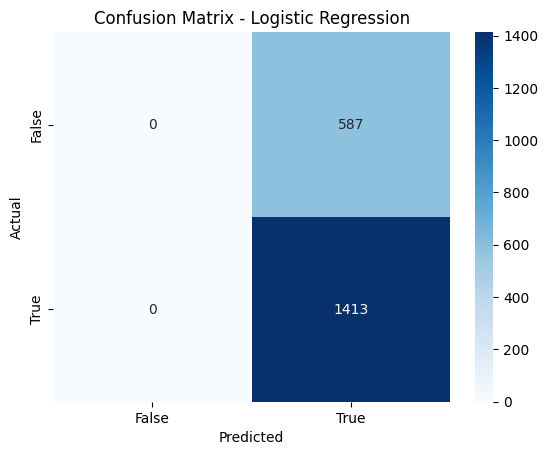

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ----------------------------------
# Prepare Features (X) and Target (y)
# ----------------------------------

# Encode StudentLevel if still string
if "StudentLevel" in df.columns:
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    df["StudentLevel_encoded"] = le.fit_transform(df["StudentLevel"])
    df = df.drop(columns=["StudentLevel"])


# One-hot encode SessionLengthCategory if it exists
if "SessionLengthCategory" in df.columns:
    df = pd.get_dummies(df, columns=["SessionLengthCategory"], prefix="SessionLength")

# Drop target + raw date + IDs
drop_cols = ["UsedAgain", "FinalOutcome", "SessionDate"]
if "SessionID" in df.columns:
    drop_cols.append("SessionID")

X = df.drop(columns=drop_cols, errors="ignore")

# Keep only numeric features
X = X.select_dtypes(include=["number", "bool"])
y = df["UsedAgain"]

# ----------------------------------
# Train-Test Split
# ----------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ----------------------------------
# Train Logistic Regression
# ----------------------------------
log_reg = LogisticRegression(max_iter=1000, solver="lbfgs")
log_reg.fit(X_train, y_train)

# ----------------------------------
# Predictions & Evaluation
# ----------------------------------
y_pred = log_reg.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

# ----------------------------------
# Confusion Matrix
# ----------------------------------
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=log_reg.classes_,
            yticklabels=log_reg.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


In [68]:
# Get feature names
feature_names = X.columns

# Get coefficients
coef = log_reg.coef_[0]

# Build dataframe of feature importance
coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coef,
    "Odds_Ratio": np.exp(coef)  # exponentiate to get odds ratio
}).sort_values(by="Odds_Ratio", ascending=False)

# Display results
pd.set_option("display.max_rows", None)  # show all if many features
print(coef_df)


                   Feature  Coefficient  Odds_Ratio
9          TaskType_Coding     0.253455    1.288469
17      SessionLength_Long     0.138728    1.148812
13        TaskType_Writing     0.135548    1.145165
14        PromptsPerMinute     0.096731    1.101564
23      SessionLength_Long     0.017853    1.018013
20      SessionLength_Long     0.017853    1.018013
3       SatisfactionRating     0.005654    1.005670
7     StudentLevel_encoded     0.005023    1.005036
16    SessionLength_Medium     0.004114    1.004123
6                      Day     0.000581    1.000581
4                     Year     0.000535    1.000535
22    SessionLength_Medium    -0.000931    0.999070
19    SessionLength_Medium    -0.000931    0.999070
1             TotalPrompts    -0.001607    0.998394
0         SessionLengthMin    -0.007274    0.992752
5                    Month    -0.011549    0.988518
21     SessionLength_Short    -0.016802    0.983339
18     SessionLength_Short    -0.016802    0.983339
2       AI_A

✅ Accuracy: 0.4465

📊 Classification Report:
                       precision    recall  f1-score   support

Assignment Completed       0.50      0.76      0.60       953
            Confused       0.22      0.07      0.10       323
             Gave Up       0.00      0.00      0.00       151
        Idea Drafted       0.33      0.26      0.29       573

            accuracy                           0.45      2000
           macro avg       0.26      0.27      0.25      2000
        weighted avg       0.37      0.45      0.39      2000



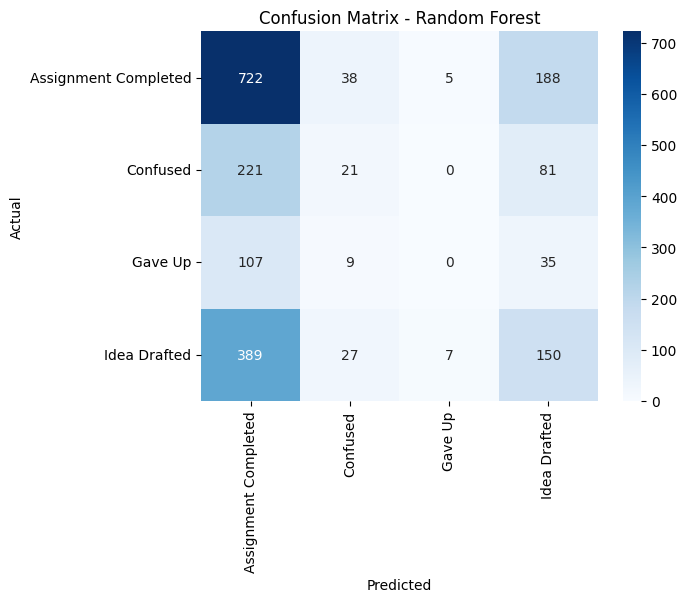

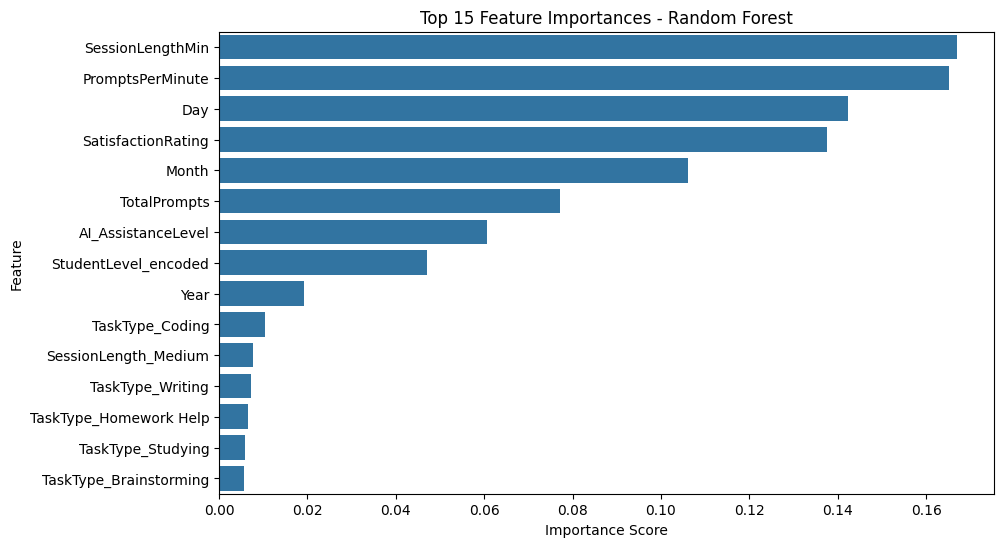

In [71]:
# Keep only numeric features
X = X.select_dtypes(include=["number", "bool"])
y = df["FinalOutcome"]

# ----------------------------------
# Train-Test Split
# ----------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ----------------------------------
# Train Random Forest
# ----------------------------------
rf_model = RandomForestClassifier(
    n_estimators=100,   # number of trees
    max_depth=None,     # let trees grow fully (can tune later)
    random_state=42
)
rf_model.fit(X_train, y_train)

# ----------------------------------
# Predictions & Evaluation
# ----------------------------------
y_pred = rf_model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

# ----------------------------------
# Confusion Matrix
# ----------------------------------
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=rf_model.classes_,
            yticklabels=rf_model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# ----------------------------------
# Feature Importance
# ----------------------------------
importances = rf_model.feature_importances_
feat_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_importances[:15], y=feat_importances.index[:15])
plt.title("Top 15 Feature Importances - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


✅ Accuracy: 0.6335

📊 Classification Report:
               precision    recall  f1-score   support

       False       0.26      0.14      0.18       587
        True       0.70      0.84      0.76      1413

    accuracy                           0.63      2000
   macro avg       0.48      0.49      0.47      2000
weighted avg       0.57      0.63      0.59      2000



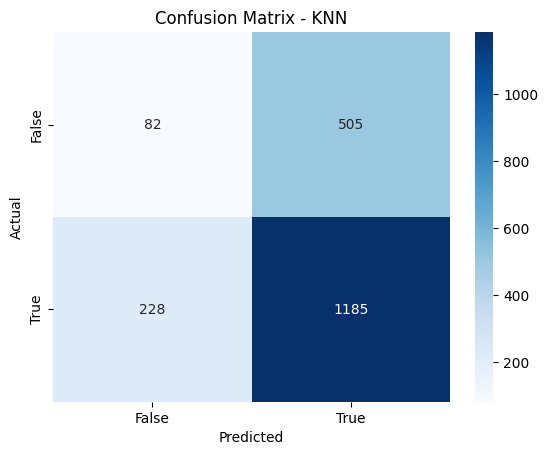

In [76]:
# Drop target + raw date + IDs
drop_cols = ["UsedAgain", "FinalOutcome", "SessionDate"]
if "SessionID" in df.columns:
    drop_cols.append("SessionID")

X = df.drop(columns=drop_cols, errors="ignore")

# Keep only numeric features
X = X.select_dtypes(include=["number", "bool"])
y = df["UsedAgain"]

# ----------------------------------
# Train-Test Split
# ----------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ----------------------------------
# Feature Scaling (important for KNN)
# ----------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ----------------------------------
# Train KNN
# ----------------------------------
knn_model = KNeighborsClassifier(n_neighbors=5)  # default k=5
knn_model.fit(X_train_scaled, y_train)

# ----------------------------------
# Predictions & Evaluation
# ----------------------------------
y_pred = knn_model.predict(X_test_scaled)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

# ----------------------------------
# Confusion Matrix
# ----------------------------------
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=knn_model.classes_,
            yticklabels=knn_model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNN")
plt.show()

✅ Accuracy: 0.474

📊 Classification Report:
                       precision    recall  f1-score   support

Assignment Completed       0.50      0.90      0.64       953
            Confused       0.35      0.02      0.04       323
             Gave Up       0.10      0.07      0.08       151
        Idea Drafted       0.46      0.13      0.20       573

            accuracy                           0.47      2000
           macro avg       0.35      0.28      0.24      2000
        weighted avg       0.44      0.47      0.37      2000



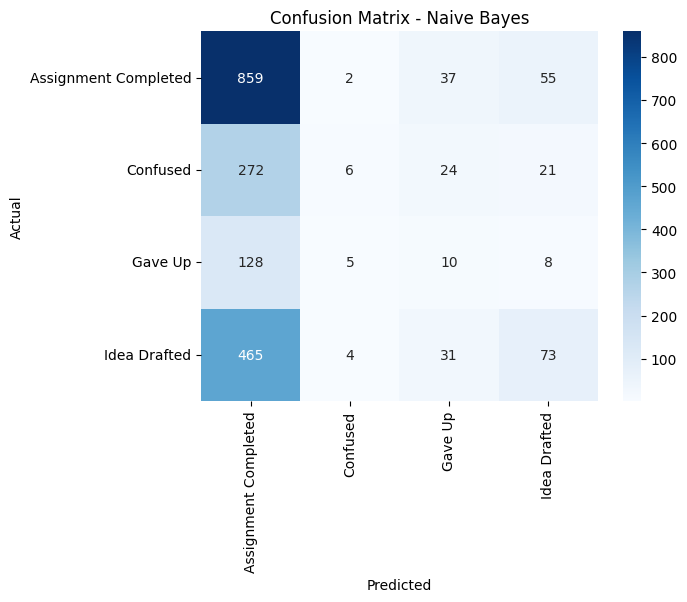

In [78]:
# Keep only numeric features
X = X.select_dtypes(include=["number", "bool"])
y = df["FinalOutcome"]

# ----------------------------------
# Train-Test Split
# ----------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ----------------------------------
# Train Naive Bayes
# ----------------------------------
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# ----------------------------------
# Predictions & Evaluation
# ----------------------------------
y_pred = nb_model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

# ----------------------------------
# Confusion Matrix
# ----------------------------------
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=nb_model.classes_,
            yticklabels=nb_model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Naive Bayes")
plt.show()

✅ Accuracy: 0.6975

📊 Classification Report:
               precision    recall  f1-score   support

       False       0.20      0.01      0.02       587
        True       0.71      0.98      0.82      1413

    accuracy                           0.70      2000
   macro avg       0.45      0.50      0.42      2000
weighted avg       0.56      0.70      0.59      2000



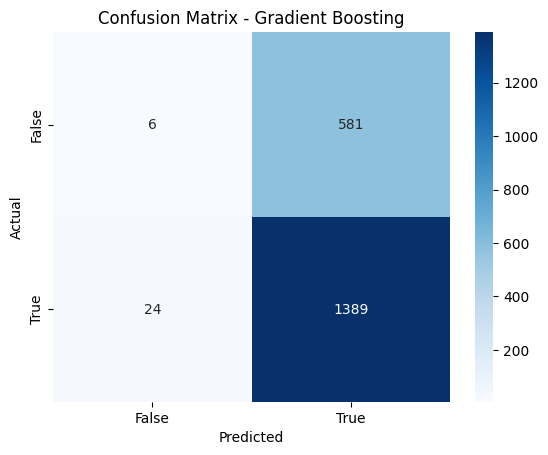

In [80]:
# Keep only numeric features
X = X.select_dtypes(include=["number", "bool"])
y = df["UsedAgain"]

# ----------------------------------
# Train-Test Split
# ----------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ----------------------------------
# Train Gradient Boosting Classifier
# ----------------------------------
gb_model = GradientBoostingClassifier(
    n_estimators=200,     # number of trees
    learning_rate=0.1,    # step size
    max_depth=3,          # tree depth
    random_state=42
)
gb_model.fit(X_train, y_train)

# ----------------------------------
# Predictions & Evaluation
# ----------------------------------
y_pred = gb_model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

# ----------------------------------
# Confusion Matrix
# ----------------------------------
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=gb_model.classes_,
            yticklabels=gb_model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Gradient Boosting")
plt.show()